# Pytorch Lessons

## Import main libraries

In [11]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

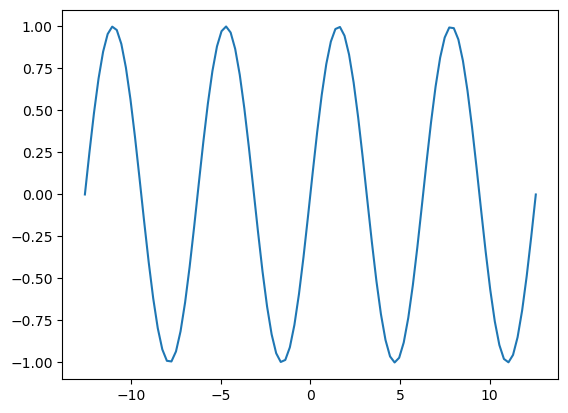

In [12]:
plt.plot(np.linspace(-4*np.pi,4*np.pi,100),np.sin(np.linspace(-4*np.pi,4*np.pi,100)))

In [13]:


import torch
from torch import nn
from torch.utils.data import DataLoader

# from torchvision import datasets
# from torchvision.transforms import ToTensor

from torch.utils.data import Dataset
from torch.utils.tensorboard import SummaryWriter



## Tensors

Creating tensors and some tensor attibutes:

Quickest way (just allocates memmory):

In [14]:
dumm = torch.empty(10,10)

print(dumm)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


Random tensors


In [15]:
# Initialize a tensor with random values:

torch.manual_seed(0)  # For reproducibility

dumm_random = torch.rand(10,10)

print(dumm_random)

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901, 0.8964, 0.4556,
         0.6323],
        [0.3489, 0.4017, 0.0223, 0.1689, 0.2939, 0.5185, 0.6977, 0.8000, 0.1610,
         0.2823],
        [0.6816, 0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362, 0.1852,
         0.3734],
        [0.3051, 0.9320, 0.1759, 0.2698, 0.1507, 0.0317, 0.2081, 0.9298, 0.7231,
         0.7423],
        [0.5263, 0.2437, 0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783,
         0.4820],
        [0.8198, 0.9971, 0.6984, 0.5675, 0.8352, 0.2056, 0.5932, 0.1123, 0.1535,
         0.2417],
        [0.7262, 0.7011, 0.2038, 0.6511, 0.7745, 0.4369, 0.5191, 0.6159, 0.8102,
         0.9801],
        [0.1147, 0.3168, 0.6965, 0.9143, 0.9351, 0.9412, 0.5995, 0.0652, 0.5460,
         0.1872],
        [0.0340, 0.9442, 0.8802, 0.0012, 0.5936, 0.4158, 0.4177, 0.2711, 0.6923,
         0.2038],
        [0.6833, 0.7529, 0.8579, 0.6870, 0.0051, 0.1757, 0.7497, 0.6047, 0.1100,
         0.2121]])


Initializing with ones and zeros

In [16]:

# Initialize a tensor with zeros:

dumm_zeros = torch.zeros(10,10)

print(dumm_zeros)

dumm_ones = torch.ones(10,10)

print(dumm_ones)




tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]

Shapes

In [17]:
x = torch.rand(3,3)

y = torch.ones_like(x)
w = torch.rand_like(x)

print(y)
print(w)

print('Shape of x:', x.shape)



tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.5751, 0.2952, 0.7967],
        [0.1957, 0.9537, 0.8426],
        [0.0784, 0.3756, 0.5226]])
Shape of x: torch.Size([3, 3])


Numpy and tensor data type

In [18]:

X = np.random.normal(0,1,(10,10))
X = torch.tensor(X, dtype=torch.float64)


print('Element of a tensor:')
print(X[0,0])
print('Numpy content')
print(X.numpy())
print('Device')
print(X.device)
print('Shape')
print(X.shape)


Element of a tensor:
tensor(0.5744, dtype=torch.float64)
Numpy content
[[ 5.74381092e-01 -6.43855538e-01 -2.50905808e-01 -1.06933863e-01
   4.62085054e-01 -7.19598428e-01 -1.10997644e+00  1.56024797e-01
   1.15700489e+00  5.64204909e-01]
 [ 2.36247828e+00  9.31001826e-01 -2.40140794e-01  4.39908915e-01
   3.52902598e-01  9.65216541e-02  1.29111470e+00  2.05808519e+00
  -1.25352006e+00  4.66415595e-01]
 [ 7.59509039e-04  1.04523404e+00  2.06216909e-01  8.99202671e-01
  -1.66924182e+00  4.18398148e-01  1.13366126e+00  9.71507062e-02
   1.65655545e+00 -8.24666525e-01]
 [ 1.34143992e-02  7.72418791e-01 -5.92330647e-01  9.02377273e-01
  -1.14731700e-01  3.47138807e-02  1.31467604e+00  1.02857445e-01
  -3.09359301e-02  2.79172060e-01]
 [ 1.34749662e+00  1.33660918e+00 -1.27126004e+00 -6.63973958e-01
   1.31495369e+00  1.50050467e+00  7.65512316e-01  3.01991703e-03
   2.23840912e-01 -8.71351303e-01]
 [ 9.08489412e-02 -7.34560603e-02 -6.17820542e-01  8.65602636e-01
   2.02351622e-01 -1.7526298

Casting between tensor data types. to also used to change data from cpu to gpu (device parameter)ç.

In [19]:
x = torch.tensor([1.3,2.4,3.7,4.9,5.8], dtype=torch.float64)

print(x)

print('Data type of x:', x.dtype)

print(x.to(torch.int16))  # Cast to float32



tensor([1.3000, 2.4000, 3.7000, 4.9000, 5.8000], dtype=torch.float64)
Data type of x: torch.float64
tensor([1, 2, 3, 4, 5], dtype=torch.int16)


Operations on tensors:

In [20]:
x = np.arange(12, dtype=np.float64).reshape(3,4)

y = 1 + x

print(x)
print(y)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


In [21]:

a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64)
b = torch.tensor(np.arange(10,19).reshape(3,3), dtype=torch.float64)

print('Sum of two tensors:')
print(a+b)
print('Tensor multiplication:')
print(a @ b)
print('Tensor transpose:')
print((a @ b).T)
print('Tensor multiplication:')
print(torch.matmul(a,b))
print('Mean:')
print(torch.mean(a))


Sum of two tensors:
tensor([[11., 13., 15.],
        [17., 19., 21.],
        [23., 25., 27.]], dtype=torch.float64)
Tensor multiplication:
tensor([[ 84.,  90.,  96.],
        [201., 216., 231.],
        [318., 342., 366.]], dtype=torch.float64)
Tensor transpose:
tensor([[ 84., 201., 318.],
        [ 90., 216., 342.],
        [ 96., 231., 366.]], dtype=torch.float64)
Tensor multiplication:
tensor([[ 84.,  90.,  96.],
        [201., 216., 231.],
        [318., 342., 366.]], dtype=torch.float64)
Mean:
tensor(5., dtype=torch.float64)


Inplace operators have a _ in the end:

In [22]:
print(a)
a.transpose_(0,1)
print(a)
a.add_(5.0)
print(a)

a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64)
b = torch.tensor(np.arange(10,19).reshape(3,3), dtype=torch.float64)

print(b)

b.add_(a)

print(b)




tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]], dtype=torch.float64)
tensor([[ 6.,  9., 12.],
        [ 7., 10., 13.],
        [ 8., 11., 14.]], dtype=torch.float64)
tensor([[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]], dtype=torch.float64)
tensor([[11., 13., 15.],
        [17., 19., 21.],
        [23., 25., 27.]], dtype=torch.float64)


Placing a tensor in the space of another

In [23]:
a = torch.tensor(np.arange(1,13).reshape(3,4), dtype=torch.float64)

b = torch.ones_like(a)

torch.add(a, a, out=b)

print(b)

tensor([[ 2.,  4.,  6.,  8.],
        [10., 12., 14., 16.],
        [18., 20., 22., 24.]], dtype=torch.float64)


Numpy and torch

In [24]:
# In CPU
a = np.arange(1,10).reshape(3,3)
print(a)
t = torch.from_numpy(a)
print(t)
a[0,0] = 4
print(t)

t_ = torch.ones(3,3)

print(t_)

n_ = t_.numpy()

n_[0,0] = 5.0

print(t_)




[[1 2 3]
 [4 5 6]
 [7 8 9]]
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], dtype=torch.int32)
tensor([[4, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], dtype=torch.int32)
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[5., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [25]:
if torch.accelerator.is_available():
    tensor = tensor.to(torch.accelerator.current_accelerator())

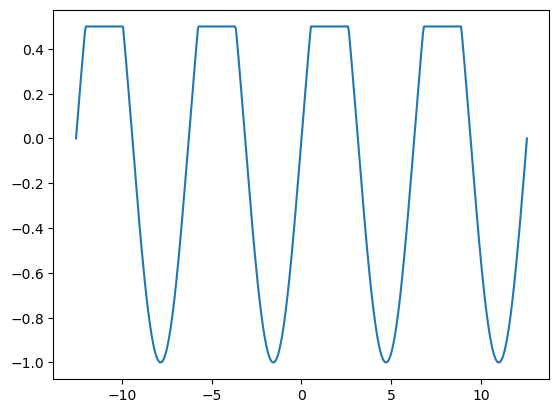

In [26]:
x = torch.linspace(-4*np.pi,4*np.pi,500)

y = torch.sin(x)

y = torch.clamp(y, -2, 0.5)

plt.plot(x.numpy(), y.numpy())

In [27]:
a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64)
b = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64)

torch.eq(a, b)  # Element-wise equality check

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

Copying vs cloning

In [28]:
a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64)

b = a

print(id(a))

print(id(b))

b = a.clone()

print(id(b))


2305912166240
2305912166240
2305911410576


Notice that clone preserves requires_grad. The object being cloned should be detached before cloning.

In [29]:
a = torch.tensor(np.arange(1,10).reshape(3,3), dtype= torch.float64 ,requires_grad=True)

b = a

print(a)
print(b)

c = a.clone()

print(c)

d = a.detach().clone()

print(d)

print(id(a))
print(id(b))
print(id(c))
print(id(d))


tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64, requires_grad=True)
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64, requires_grad=True)
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64, grad_fn=<CloneBackward0>)
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
2305911958368
2305911958368
2305637222096
2305910786224


To get scalar from tensor

In [30]:
a = torch.linspace(1,10, 20,dtype=torch.float64)

a[0].item()

1.0

Tensor shapes.

unsqueeze adds an extra dimension, so that an aditional dimension can be added to a single example so that it can include more examples. 

In [31]:
a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64)

print(a)

print(a.shape)

print(a.unsqueeze(0))

print(a.shape)

a.unsqueeze_(0)

print(a.shape)



tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
torch.Size([3, 3])
tensor([[[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]], dtype=torch.float64)
torch.Size([3, 3])
torch.Size([1, 3, 3])


squeeze does the opposite, but it only works if 1 is one of the dimensions.

In [32]:
a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64)

print(a)

print(a.squeeze(0))

a.unsqueeze_(0)

print(a)

print(a.squeeze(0))


tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
tensor([[[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]], dtype=torch.float64)
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)


# Autograd

tensor([ 8.7423e-08, -2.1497e-01, -4.1989e-01, -6.0517e-01, -7.6216e-01,
        -8.8351e-01, -9.6355e-01, -9.9853e-01, -9.8683e-01, -9.2898e-01,
        -8.2769e-01, -6.8770e-01, -5.1555e-01, -3.1930e-01, -1.0812e-01,
         1.0812e-01,  3.1930e-01,  5.1555e-01,  6.8770e-01,  8.2769e-01,
         9.2898e-01,  9.8683e-01,  9.9853e-01,  9.6355e-01,  8.8351e-01,
         7.6216e-01,  6.0517e-01,  4.1989e-01,  2.1497e-01, -8.7423e-08],
       grad_fn=<SinBackward0>)
tensor(2.9802e-07, grad_fn=<SumBackward0>)


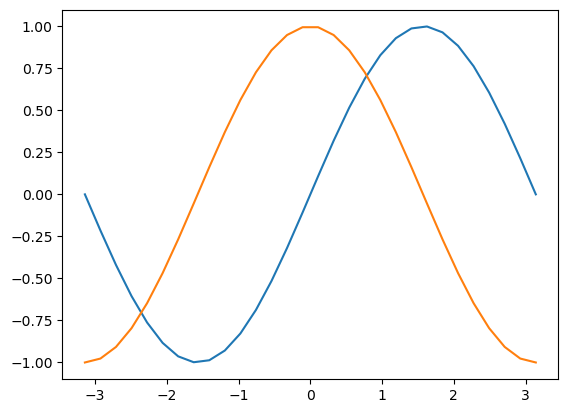

In [33]:
x = torch.linspace(-np.pi,np.pi,30, requires_grad=True)
y = torch.sin(x)

print(y)

plt.plot(x.detach(), y.detach())

y_sum = torch.sum(y)

y_sum.backward()

print(y_sum)

plt.plot(x.detach(), x.grad.detach())


How to disable differentiation (4 ways)

In [34]:
# How to disable differentiation (4 ways)
# While declaring the tensor

a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64, requires_grad=False)

b = a + 2

print('While declaring the tensor')
print('a:', a)
print('b:', b)

# Using .requires_grad_() method


a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64, requires_grad=True)

print('\nUsing .requires_grad_() method')
print('a:', a)
a.requires_grad_(False)
print('a:', a)

# With no grad context manager

a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64, requires_grad=True)

with torch.no_grad():
    b = a + 2   

print('\nWith no grad context manager')
print('a:', a)
print('b:', b)

# Using .detach() method

a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64, requires_grad=True)


b = a.detach() + 2

print('\nUsing .detach() method')
print('a:', a)
print('b:', b)

# With function decorator

@torch.no_grad()
def add_ten(tensor):
    return tensor + 10

a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64, requires_grad=True)
b = add_ten(a)

print('\nWith function decorator')
print('a:', a)
print('b:', b)




While declaring the tensor
a: tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
b: tensor([[ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)

Using .requires_grad_() method
a: tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64, requires_grad=True)
a: tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)

With no grad context manager
a: tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64, requires_grad=True)
b: tensor([[ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)

Using .detach() method
a: tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64, requires_grad=True)
b: tensor([[ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)

With function decorator
a: tensor([[1., 2., 3.],
        [4., 5., 6.],


Inplace operators with autograd enabled are not allowed.

In [35]:
a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64, requires_grad=True)

print(a)

torch.sin_(a)

print(a)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64, requires_grad=True)


RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

Directional gradient

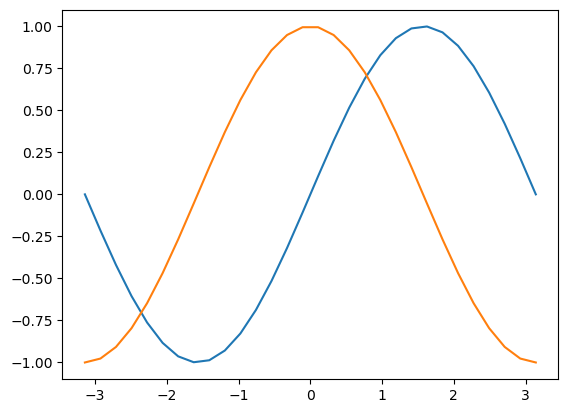

In [36]:
x = torch.linspace(-np.pi,np.pi,30, requires_grad=True)
y = torch.sin(x)

y.backward(torch.ones_like(x))


plt.plot(x.detach(), y.detach())
plt.plot(x.detach(), x.grad.detach())

## Autograd in training

In [37]:
class MyModel(nn.Module):
    def __init__(self, num_dim):
        super(MyModel, self).__init__()
        self.linearlayer = nn.Linear(num_dim, 1, dtype=torch.float64)

    def forward(self, x):
        return self.linearlayer(x)

myloss: 2.4913464644864516
myloss_torch: 2.4913464644864516
Torch gradient tensor([[2.8923]], dtype=torch.float64)
Manual computation of gradient tensor([[2.8923]], dtype=torch.float64, grad_fn=<DivBackward0>)
Initial weights: [[0.940106]]
Weights after one optimization step: [[0.91118322]]
Manual update: [[0.91118322]]
Epoch 0, Loss: 2.3899763857599234
Epoch 50, Loss: 0.3073030691965149
Epoch 100, Loss: 0.04696640613700359
Epoch 150, Loss: 0.01389162048260384
Epoch 200, Loss: 0.009610699305110236
Epoch 250, Loss: 0.009045109692722472
Epoch 300, Loss: 0.0089687384183795
Epoch 350, Loss: 0.008958195217890793
Epoch 400, Loss: 0.008956708043042747
Epoch 450, Loss: 0.008956494020110924


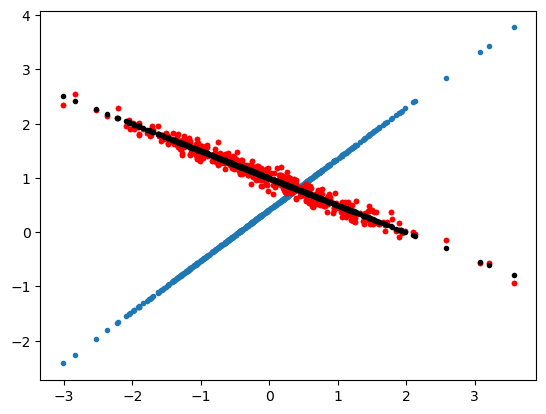

In [38]:
num_poins = 500


x = np.random.normal(0,1,num_poins)

y = 1.0 - 0.5 * x + np.random.normal(0,0.1,num_poins)

x = torch.tensor(x, dtype=torch.float64).reshape(-1,1)
y = torch.tensor(y, dtype=torch.float64).reshape(-1,1)

torch.manual_seed(0)

model = MyModel(1)

prediction = model(x)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model_init_weights = model.linearlayer.weight.detach().clone().numpy()

loss = (prediction - y).pow(2).mean()


loss_torch = torch.nn.MSELoss()(prediction, y)

print('myloss:', loss.item())
print('myloss_torch:', loss_torch.item())

loss_torch.backward()

print('Torch gradient',model.linearlayer.weight.grad)  # Gradient of the weights
print('Manual computation of gradient',-2*x.T@(y-prediction)/num_poins)  # Manual computation of the gradient

grad = model.linearlayer.weight.grad.numpy()

optimizer.step()
optimizer.zero_grad()

print('Initial weights:', model_init_weights)
print('Weights after one optimization step:', model.linearlayer.weight.detach().numpy())
print('Manual update:', model_init_weights - 0.01 * grad)

plt.plot(x.numpy(), prediction.detach().numpy(), '.')
plt.plot(x.numpy(), y.numpy(), 'r.')

for epoch in range(500):
    prediction = model(x)
    loss = torch.nn.MSELoss()(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


plt.plot(x.numpy(), y.numpy(), 'r.')
plt.plot(x.numpy(), prediction.detach().numpy(), 'k.')



Turning autograd on and off:

In [39]:
a = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

b = a * 2

print(a)
print(b)

a.requires_grad = False

c = a * 2

print(a)
print(c)



tensor([1., 2., 3.], requires_grad=True)
tensor([2., 4., 6.], grad_fn=<MulBackward0>)
tensor([1., 2., 3.])
tensor([2., 4., 6.])


In [40]:
a = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

with torch.no_grad():
    b = a * 2

print(a)
print(b)

tensor([1., 2., 3.], requires_grad=True)
tensor([2., 4., 6.])


In [41]:
def my_average(tensor):
    return tensor.sum() / tensor.numel()

@torch.no_grad()
def my_average_nograd(tensor):
    return tensor.sum() / tensor.numel()


a = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

b = my_average(a)
c = my_average_nograd(a)

print(b)
print(c)

tensor(2., grad_fn=<DivBackward0>)
tensor(2.)


In [42]:
a = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

b = a.detach() * 2

print(b)

tensor([2., 4., 6.])


There is an autograd profiler

In [43]:
x = torch.randn(1000, 1000, requires_grad=True)

with torch.autograd.profiler.profile(use_cpu=True, profile_memory=True) as prof:
    for _ in range(100):
        y = x * x
        z = y + y
        h = torch.sin(z)
        '''
        out = z.mean()
        out.backward()
        x.grad.zero_()
        '''

print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))



-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::mul        38.45%      52.338ms        38.45%      52.338ms     523.379us     381.47 Mb     381.47 Mb           100  
    aten::add        31.47%      42.846ms        31.47%      42.846ms     428.459us     381.47 Mb     381.47 Mb           100  
    aten::sin        30.08%      40.948ms        30.08%      40.948ms     409.476us     381.47 Mb     381.47 Mb           100  
     [memory]         0.00%       0.000us         0.00%       0.000us       0.000us      -1.11 Gb      -1.11 Gb           297  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  -----

High order differentials:

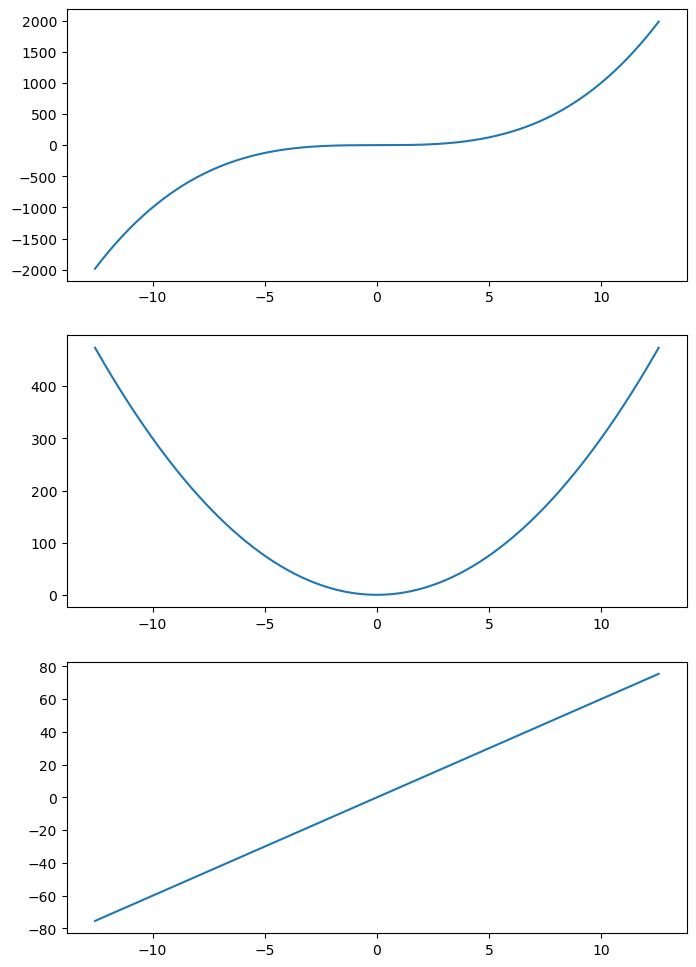

In [44]:
x = torch.linspace(-4*np.pi,4*np.pi,500, requires_grad=True)

y = (x**3)
y_sum = y.sum()

grad_y = torch.autograd.grad(y_sum, x, create_graph=True)[0]

grad_y_sum = grad_y.sum()

grad_2y = torch.autograd.grad(grad_y_sum , x, create_graph=True)[0]

f, ax = plt.subplots(3,1, figsize=(8,12))

ax[0].plot(x.detach(), y.detach())
ax[1].plot(x.detach(), grad_y.detach())
ax[2].plot(x.detach(), grad_2y.detach())


In [45]:
grad_y

tensor([4.7374e+02, 4.6995e+02, 4.6618e+02, 4.6242e+02, 4.5867e+02, 4.5494e+02,
        4.5123e+02, 4.4753e+02, 4.4385e+02, 4.4018e+02, 4.3653e+02, 4.3289e+02,
        4.2927e+02, 4.2566e+02, 4.2207e+02, 4.1849e+02, 4.1493e+02, 4.1138e+02,
        4.0785e+02, 4.0434e+02, 4.0083e+02, 3.9735e+02, 3.9388e+02, 3.9042e+02,
        3.8698e+02, 3.8356e+02, 3.8015e+02, 3.7676e+02, 3.7338e+02, 3.7001e+02,
        3.6666e+02, 3.6333e+02, 3.6001e+02, 3.5671e+02, 3.5342e+02, 3.5015e+02,
        3.4689e+02, 3.4365e+02, 3.4042e+02, 3.3721e+02, 3.3402e+02, 3.3084e+02,
        3.2767e+02, 3.2452e+02, 3.2138e+02, 3.1826e+02, 3.1516e+02, 3.1207e+02,
        3.0899e+02, 3.0593e+02, 3.0289e+02, 2.9986e+02, 2.9685e+02, 2.9385e+02,
        2.9087e+02, 2.8790e+02, 2.8495e+02, 2.8201e+02, 2.7909e+02, 2.7618e+02,
        2.7329e+02, 2.7041e+02, 2.6755e+02, 2.6470e+02, 2.6187e+02, 2.5906e+02,
        2.5625e+02, 2.5347e+02, 2.5070e+02, 2.4794e+02, 2.4520e+02, 2.4248e+02,
        2.3977e+02, 2.3708e+02, 2.3440e+

## Datasets

To implement a custom dataset, we use simulated data.



In [46]:
num = 10000
ep = 0.1

x = np.random.uniform(-4*np.pi,4*np.pi,(num,2))

y = np.sin(np.sqrt(x[:,0]**2+x[:,1]**2))+ ep*np.random.normal(0,1,num)


np.save('../DATA/x.npy', x)
np.save('../DATA/y.npy', y)


In [47]:
class CustomDataset(Dataset):
    def __init__(self, x_file, y_file):
        # Class constructor:
        # Loads the dataset from files:
        self.x = torch.tensor(np.load(x_file), dtype=torch.float64)
        self.y = torch.tensor(np.load(y_file), dtype=torch.float64)
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        # Retrieves an item from the dataset:
        # In very big daytasets, we should not load all data at once.

        return self.x[index], self.y[index]
        # TODO: convert to tensor 
        
    def __len__(self):
        # Returns the length of the dataset:
        return self.len

In [48]:
data = CustomDataset('../DATA/x.npy', '../DATA/y.npy')

data.__getitem__(0)

(tensor([12.2514, -9.1253], dtype=torch.float64),
 tensor(0.6179, dtype=torch.float64))

## Dataloaders

In [49]:
v = np.arange(1,10)

it = iter(v)

print(next(it))
print(next(it))


1
2


In [50]:
train_loader = DataLoader(data, batch_size=64, shuffle=True)

x_batch, y_batch = next(iter(train_loader))

print(x_batch)

print(y_batch)



tensor([[ 10.9621,   0.3391],
        [ -6.9068,  -9.1806],
        [  3.7269,  11.1599],
        [ -8.3642,   4.4517],
        [  1.4034,  -3.6093],
        [  0.4759,  -7.4104],
        [-10.7626,   2.2246],
        [ -0.0652,  -7.4837],
        [  0.0880,  -8.8636],
        [  8.0598,  -1.5330],
        [ -4.3614,   7.6306],
        [  1.1448,   3.7491],
        [  0.6741,  -0.9426],
        [  4.0570,  -5.9918],
        [ -2.3707,  -9.9553],
        [  1.8891,  -8.3747],
        [  2.1154,   8.3056],
        [ 10.0539,   2.4126],
        [-12.0707,  10.8665],
        [ -1.1103,  -5.5888],
        [ -6.7583,  11.6025],
        [ -9.8942,  10.8278],
        [  7.6419,  -0.2557],
        [ -1.7127,   5.5430],
        [  4.4754,  11.1062],
        [ -5.1017,  -3.5765],
        [  5.3999,   2.3051],
        [  0.7159,  -5.4969],
        [  6.3337,   7.2051],
        [-11.1388,   6.4180],
        [  9.7094,  -3.3106],
        [  2.2832,  -7.7805],
        [  2.1306,  11.8542],
        [ 

## Buiding models

### torch.nn.Module torch.nn.Parameters

In [51]:
class MyModel2(nn.Module):
    def __init__(self, num_dim):
        super(MyModel2, self).__init__()
        
        self.layer1 = nn.Linear(num_dim, 64, dtype=torch.float64)
        self.layer2 = nn.Linear(64, 64, dtype=torch.float64)
        self.layer3 = nn.Linear(64, 1, dtype=torch.float64)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x

In [52]:
test = MyModel2(2)

print(test)


print(test.layer1)

print('Model parameters:')

for f in test.parameters():
    print(f)

print('Layer1 parameters:')
for f in test.layer1.parameters():
    print(f)






MyModel2(
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (activation): ReLU()
)
Linear(in_features=2, out_features=64, bias=True)
Model parameters:
Parameter containing:
tensor([[-0.0010,  0.6176],
        [-0.3586, -0.2718],
        [-0.1384,  0.5789],
        [-0.1308, -0.2011],
        [ 0.3028,  0.6527],
        [ 0.6241, -0.2892],
        [ 0.3679,  0.4034],
        [-0.4774, -0.3643],
        [-0.1239, -0.1525],
        [ 0.0605,  0.4966],
        [-0.0127,  0.4617],
        [ 0.0954,  0.5710],
        [-0.0998,  0.4480],
        [-0.4624,  0.3399],
        [ 0.1903,  0.1646],
        [-0.3147, -0.0705],
        [-0.4212,  0.1733],
        [-0.1551,  0.5043],
        [ 0.1288,  0.1624],
        [ 0.3397, -0.4757],
        [-0.0874, -0.3278],
        [-0.6977, -0.5888],
        [ 0.3734, -0.0078],
        [ 0.5209, -0.2935],
        [ 0.4785

## Model training

In [81]:
class MyModel3(nn.Module):

    def __init__(self, num_dim):
        super(MyModel3, self).__init__()
        self.layer1 = nn.Linear(num_dim, 64, dtype=torch.float64)
        self.activation1 = nn.Softplus()
        self.layer2 = nn.Linear(64, 64, dtype=torch.float64)
        self.activation2 = nn.Softplus()
        self.layer3 = nn.Linear(64, 1, dtype=torch.float64)
        
    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.layer3(x)
        return x

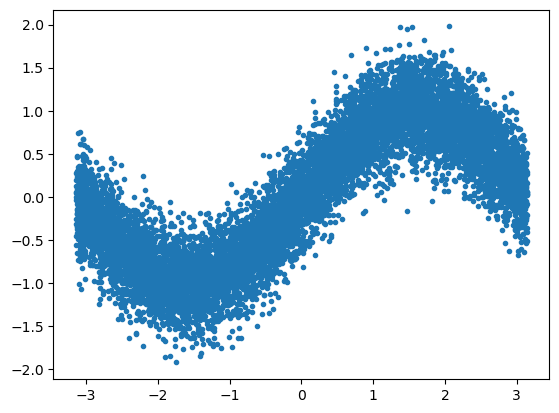

In [82]:
x = np.random.uniform(-1*np.pi,1*np.pi,(10000))
y = np.sin(x) + 0.3*np.random.normal(0,1,10000)

plt.plot(x, y, '.')

x = torch.tensor(x, dtype=torch.float64).reshape(-1,1)
y = torch.tensor(y, dtype=torch.float64).reshape(-1,1)


Epoch 0, Loss: 0.12791372383575297
Epoch 1, Loss: 0.1154531302698735
Epoch 2, Loss: 0.11158903258392489
Epoch 3, Loss: 0.10424794800905621
Epoch 4, Loss: 0.10008757150937841
Epoch 5, Loss: 0.09755002626128767
Epoch 6, Loss: 0.09592678565536253
Epoch 7, Loss: 0.0949098751732145
Epoch 8, Loss: 0.09426088532135432
Epoch 9, Loss: 0.093768478865077
Epoch 10, Loss: 0.09327061383275595
Epoch 11, Loss: 0.09278378913895018
Epoch 12, Loss: 0.09240641842003507
Epoch 13, Loss: 0.09215675729518596
Epoch 14, Loss: 0.09201086352629953
Epoch 15, Loss: 0.09194758258470935
Epoch 16, Loss: 0.09195481658416219
Epoch 17, Loss: 0.09202683224051855
Epoch 18, Loss: 0.09215829969641967
Epoch 19, Loss: 0.09233295576178047


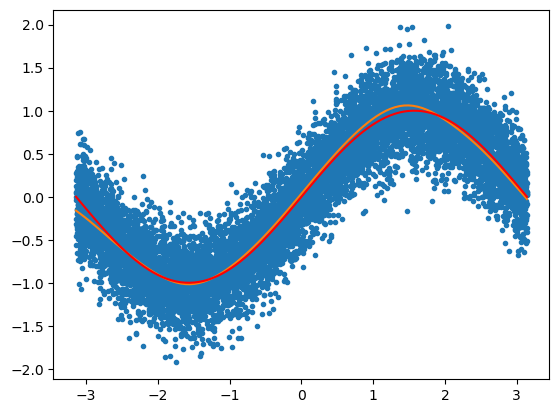

In [83]:
model = MyModel3(1)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

loss_fn = nn.MSELoss()

batch_size = 64
num_batches = x.shape[0] // batch_size

for epoch in range(20):
    for i in range(num_batches):
        x_batch = x[i*batch_size:(i+1)*batch_size]
        y_batch = y[i*batch_size:(i+1)*batch_size]
        prediction = model(x_batch)
        loss = loss_fn(prediction, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 1 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


plt.plot(x.numpy(), y.numpy(), '.')
plt.plot(np.linspace(-1*np.pi, 1*np.pi, 100), model(torch.tensor(np.linspace(-1*np.pi, 1*np.pi, 100), dtype=torch.float64).reshape(-1,1)).detach().numpy())
plt.plot(np.linspace(-1*np.pi, 1*np.pi, 100), np.sin(np.linspace(-1*np.pi, 1*np.pi, 100)), 'r')

## Tensorboard

In [87]:
writer = SummaryWriter('./runs/mytest')

To activate a tensorboard window, run the following in terminal (cd to the directory where the notebook lies):

tensorboard --logdir=runs/mytest

It will be available in http://localhost:6006/

To add an image to tensorboard:

In [88]:
x = np.random.uniform(-1*np.pi,1*np.pi,(10000))
y = np.sin(x) + 0.3*np.random.normal(0,1,10000)

f, ax  = plt.subplots()
ax.plot(x, y, '.')

writer.add_figure('Training data', f, global_step=0)  # Add the figure to tensorboard

writer.flush()

To add scalar (allows a sequence)

In [89]:

loss = np.random.normal(0,1,20)


for epoch in range(20):
    writer.add_scalar('Loss/train', loss[epoch], epoch)
    writer.flush()

To add an histogram

In [90]:
x = np.random.normal(0,1,(10000))

writer.add_histogram('Input data', x, global_step=0, bins='auto')

In [91]:
writer.add_graph(model, x_batch)

writer.flush()

## Create a sequential NN

In [ ]:
class MyNNTest(nn.Module):

    def __init__(self):
        # call the parent class constructor
        super().__init__()

        # self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

In [ ]:
# If we wanted to use GPU, we should check if it is available:
# model = NeuralNetwork().to(device)  

# To use double precision:
model = MyNNTest().double()
print(model)

In [ ]:
model(x_batch)

Model parameters

In [ ]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Another way to access model params

In [ ]:
model.state_dict()['linear_relu_stack.0.weight']

## Auto diff with torch.autograd

In [ ]:
x = torch.tensor(np.linspace(-4*np.pi,4*np.pi,100), dtype=torch.float64, requires_grad=True)

y = torch.sin(x)

y_sum = torch.sum(y)

y_sum.backward()




In [ ]:

plt.plot(x.detach().numpy(),x.grad.numpy())
plt.plot(x.detach().numpy(),y.detach().numpy())

In [ ]:
import matplotlib
import numpy

print(torch.__version__)
print(numpy.__version__)
print(matplotlib.__version__)

In [ ]:
import torch, importlib
print(torch.__version__)
print(torch._dynamo.__file__)
print(hasattr(torch._dynamo, "decorators"))
mod = importlib.import_module("torch._dynamo.decorators")
print(mod)  # should succeed; if it fails, the wheel is broken